In [ ]:
import csv # For handling csv file
import pandas as pd # To work with data
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Visualization

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/state-wise-crop-production-India.csv') # Read and mound dataset from drive
data.head(5) #Display top 5 values of the dataset

,State,Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0


**Q.1 Find the average production of crops in India.**



In [ ]:
#From the dataset, finding the average of Production column from the dataset
avg = data['Production'].mean() 
print ('Average Production of Crops in India(in Tonnes): ' + str(avg))

Average Production of Crops in India(in Tonnes): 11154093.940590419


**Q.2 Which crop has maximum yield?**


In [ ]:
#Adding Yield Column
#Yield = Production/Area 
data['Yield'] = data['Production'] / data['Area']
data

,State,Year,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0,1.653652
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0,7.448155
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0,0.273750
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0,3537.360890
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0,3.144330
...,...,...,...,...,...,...
10699,West Bengal,2013,Sugarcane,17021.0,1945042.0,114.273074
10700,West Bengal,2013,Sunflower,6434.0,8717.0,1.354834
10701,West Bengal,2013,Tobacco,12570.0,22287.0,1.773031
10702,West Bengal,2013,Urad,70052.0,48810.0,0.696768


In [ ]:
# Finding average yeild per crop
max_yeild = data.groupby('Crop').Yield.mean().to_frame('Avgyeild').reset_index()
max_yeild

,Crop,Avgyeild
0,Apple,0.000000
1,Arcanut (Processed),1.338026
2,Arecanut,1.847306
3,Arhar/Tur,0.784430
4,Ash Gourd,0.000000
...,...,...
117,Wheat,1.977121
118,Yam,0.000000
119,other fibres,0.000000
120,other misc. pulses,0.222164


In [ ]:
# Finding maximum yield per crop
# Selecting the max value for Avgyeild column and displaying corresponding Crop name.
print("The crop which has maximum yeild is: ")
max_yeild[max_yeild.Avgyeild == max_yeild.Avgyeild.max()].Crop 

The crop which has maximum yeild is: 


28    Coconut 
Name: Crop, dtype: object

Coconut has maximum yield.


**Q.3 Comparative study on Rice production between Odisha and West Bengal**


In [ ]:
#From the datset selecting rows having "Rice" as crop and state is "Odisha" or "West Bengal"

ricein_O_and_WB=data[(data.Crop=='Rice') & (data.State.isin(['Odisha','West Bengal']))]
ricein_O_and_WB

,State,Year,Crop,Area,Production,Yield
6738,Odisha,2000,Rice,4433520.0,4613380.0,1.040568
6773,Odisha,2001,Rice,4500000.0,7220000.0,1.604444
6807,Odisha,2002,Rice,4273000.0,3278000.0,0.767143
6841,Odisha,2003,Rice,4501000.0,6801000.0,1.510998
6873,Odisha,2004,Rice,4492000.0,6536000.0,1.455031
6892,Odisha,2005,Rice,4479000.0,6858000.0,1.531145
6905,Odisha,2006,Rice,4451000.0,6823000.0,1.532914
6918,Odisha,2007,Rice,4452000.0,7540000.0,1.693621
6931,Odisha,2008,Rice,4455000.0,6812000.0,1.529068
6944,Odisha,2009,Rice,4365000.0,6913000.0,1.583734


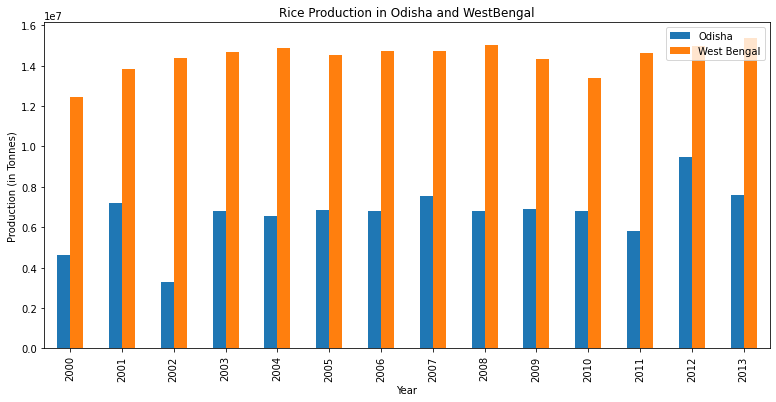

In [ ]:
ricein_O_and_WB.pivot(index='Year',columns='State',values='Production').plot(kind='bar',figsize=(13,6))
plt.xlabel('Year')
plt.ylabel('Production (in Tonnes)')
plt.title('Rice Production in Odisha and WestBengal')
plt.legend(loc='upper right')
plt.show()

It can be seen that Rice production for West Bengal is greater than the Rice production in Odisha for every year

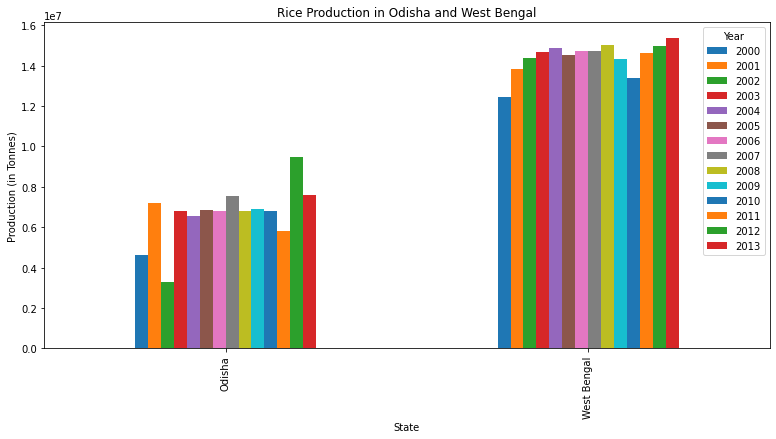

In [ ]:
ricein_O_and_WB.pivot(index='State',columns='Year',values='Production').plot(kind='bar',figsize=(13,6))
plt.xlabel('State')
plt.ylabel('Production (in Tonnes)')
plt.title('Rice Production in Odisha and West Bengal')
plt.show()

The production of Rice in West Bengal and Odisha has risen over years

**Q.4 Which state has the highest production of Wheat?**

In [ ]:
#First refining the dataset where Crop is Wheat and display the Columns 'Production','State','Crop' and 'Year'
#Futher arranging the Procuction is descending order

x=data[data.Crop=="Wheat"][['Production','State','Crop','Year']].sort_values("Production", ascending=False)
x     #print x

,Production,State,Crop,Year
9692,31892480.0,Uttar Pradesh,Wheat,2011
9758,31492656.0,Uttar Pradesh,Wheat,2013
9725,31332434.0,Uttar Pradesh,Wheat,2012
9659,30000632.0,Uttar Pradesh,Wheat,2010
9596,28554178.0,Uttar Pradesh,Wheat,2008
...,...,...,...,...
8340,0.0,Tamil Nadu,Wheat,2004
8230,0.0,Tamil Nadu,Wheat,2002
8414,0.0,Tamil Nadu,Wheat,2006
8564,0.0,Tamil Nadu,Wheat,2011


In [ ]:
#Displaying State where Production is maximum for Wheat

print("The State with highest Production of Wheat is :")
x[x.Production == x.Production.max()].State

The State with highest Production of Wheat is :


9692    Uttar Pradesh
Name: State, dtype: object

Uttar Pradesh has the highest production of Wheat.



**Q.5 Build a model to predict the production of Rice in 2014 for Andhra Pradesh, Uttar Pradesh and Tamil Nadu.**

In [ ]:
data.describe()

,Year,Area,Production,Yield
count,10704.000000,1.070400e+04,1.070400e+04,10704.000000
mean,2006.134342,2.126362e+05,1.115409e+07,75.862793
std,3.973598,7.238971e+05,2.263971e+08,1065.104538
min,2000.000000,1.000000e+00,0.000000e+00,0.000000
25%,2003.000000,1.506000e+03,1.500000e+03,0.533333
50%,2006.000000,1.096650e+04,1.551650e+04,1.000000
75%,2010.000000,9.252500e+04,1.424018e+05,2.491925
max,2013.000000,1.237800e+07,6.326000e+09,70662.500000


In [ ]:
data.isnull().sum() # Shows the sum of NULL values in dataset

State         0
Year          0
Crop          0
Area          0
Production    0
Yield         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #Using Random Forest
from sklearn.metrics import roc_auc_score, classification_report, mean_squared_error, r2_score

le = LabelEncoder()

# Alloting index for unique column values
State = le.fit_transform(data.State) #0-32 (33 States)
Year = le.fit_transform(data.Year)  #0-13 (Year 2000-2013)
Crop = le.fit_transform(data.Crop) #0-121 (122 Crops)

data['State'] = State
data['Year'] = Year
data['Crop'] = Crop
data.head(3) #Displaying top 3 values of transformed dataset

,State,Year,Crop,Area,Production,Yield
0,0,0,2,4354.0,7200.0,1.653652
1,0,0,7,1707.0,12714.0,7.448155
2,0,0,22,800.0,219.0,0.273750


In [ ]:
train = data.iloc[:, :-2]  #Selecting all the rows and upto last third column for training
test = data.iloc[:, -2] #Selecting all the rows and last second column for testing
print(train.shape)
print(test.shape)

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(train,test, test_size=0.2, random_state=100)
forest = RandomForestRegressor(n_estimators = 1000, criterion='mse',random_state=1,n_jobs=1)
forest.fit(X_train, y_train) #Train the dataset

#Testing
ytrain_pred = forest.predict(X_train)
ytest_pred = forest.predict(X_test)

(10704, 4)
(10704,)


In [ ]:
print('MSE train : %.3f , MSE Test:%.3f ' %(mean_squared_error(y_train,ytrain_pred),
                                        mean_squared_error(y_test,ytest_pred)))
print('R2score train : %.3f , R2score Test:%.3f ' %(r2_score(y_train,ytrain_pred),
                                        r2_score(y_test,ytest_pred)))

MSE train : 1510231420220929.500 , MSE Test:27640513364559260.000 
R2score train : 0.968 , R2score Test:0.597 


In [ ]:
print('Enter 1, 27 and 30 for Andhra Pradesh, Tamil Nadu and Uttar Pradesh respectively.\n14 for Year 2014.\n7 for crop Rice.\n')

#Getting user input
state= input('Enter State: ')
year= input('Enter Year: ')
crop=input('Enter Crop: ')
area=input('Enter Area: ')

output=forest.predict([[float(state),float(year),float(crop),float(area)]])
print('Crop Production:',output)

Enter 1, 27 and 30 for Andhra Pradesh, Tamil Nadu and Uttar Pradesh respectively.
14 for Year 2014.
7 for crop Rice.

Enter State: 1
Enter Year: 14
Enter Crop: 7
Enter Area: 1000
Crop Production: [130794.146]


Production of Rice in 2014 for **Andhra Pradesh** is **130794.146 Tonnes** for 1000 Hectares

In [ ]:
print('Enter 1, 27 and 30 for Andhra Pradesh, Tamil Nadu and Uttar Pradesh respectively.\n14 for Year 2014.\n7 for crop Rice.\n')
state= input('Enter State: ')
year= input('Enter Year: ')
crop=input('Enter Crop: ')
area=input('Enter Area: ')

output=forest.predict([[float(state),float(year),float(crop),float(area)]])
print('Crop Production:',output)

Enter 1, 27 and 30 for Andhra Pradesh, Tamil Nadu and Uttar Pradesh respectively.
14 for Year 2014.
7 for crop Rice.

Enter State: 30
Enter Year: 14
Enter Crop: 7
Enter Area: 1000
Crop Production: [16668.8352]


Production of Rice in 2014 for **Uttar Pradesh** is **16668.8352 Tonnes** for 1000 Hectares

In [ ]:
print('Enter 1, 27 and 30 for Andhra Pradesh, Tamil Nadu and Uttar Pradesh respectively.\n14 for Year 2014.\n7 for crop Rice.\n')
state= input('Enter State: ')
year= input('Enter Year: ')
crop=input('Enter Crop: ')
area=input('Enter Area: ')

output=forest.predict([[float(state),float(year),float(crop),float(area)]])
print('Crop Production:',output)


Enter 1, 27 and 30 for Andhra Pradesh, Tamil Nadu and Uttar Pradesh respectively.
14 for Year 2014.
7 for crop Rice.

Enter State: 27
Enter Year: 14
Enter Crop: 7
Enter Area: 1000
Crop Production: [12505.229]


Production of Rice in 2014 for **Tamil Nadu** is **12505.229 Tonnes** for 1000 Hectares

In [ ]:
#Selecting data where Crop is rice(7) and state is AP,UP,TN
datain_AP_UP_TN=data[(data.Crop==7) & (data.State.isin([1,27,30]))]

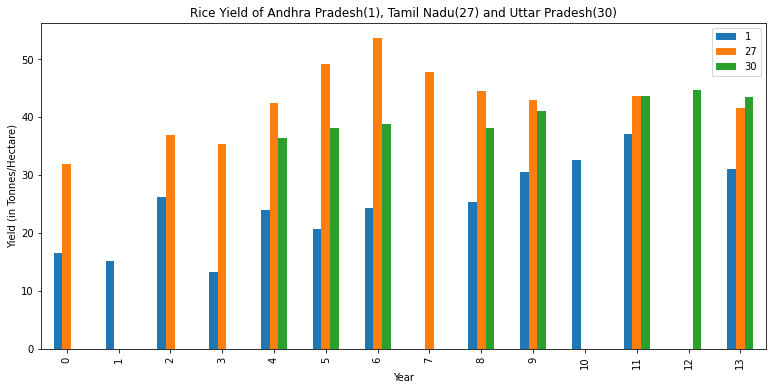

In [ ]:
#bar plat with year in x-axis and yield in y-axis
datain_AP_UP_TN.pivot(index='Year',columns='State',values='Yield').plot(kind='bar',figsize=(13,6))
plt.xlabel('Year')
plt.ylabel('Yield (in Tonnes/Hectare)')
plt.title('Rice Yield of Andhra Pradesh(1), Tamil Nadu(27) and Uttar Pradesh(30)')
plt.legend(loc='upper right')
plt.show()

*    Rice yield in Tamil Nadu is more than rice yeild in Andhra Pradesh and Uttar Pradesh.
*    In year 2006, rice yeild was maximum in Tamil Nadu after that gradual decrease can be seen.
*    Andhra Pradesh had lowest rice yeild in the year 2003.
*    In the year 2007 and 2012, rice was not cultivated in Andhra Pradesh.
*    There was no rice cultivation in UP for the year 2000-2003, 2007, 2010 and 2012.
*    In the year 2001, 2010 and 2012 Rice was not grown in Tamil Nadu.
*    In the year 2011, there was same rice yeild in TN and UP.

In [ ]:
#@title Rice Prediction GUI
#@markdown Select 1, 30 and 27 for Andhra Pradesh, Uttar Pradesh and Tamil Nadu respectively; 14 for Year 2014; 7 for crop Rice

#@markdown After selecting all the values run the cell
state = '1' #@param ["1","30","27"]
crop = '7' #@param ["7"]
year = '14' #@param ["14"]
area = 1000 #@param {type: "number"}
output=forest.predict([[float(state),float(year),float(crop),float(area)]])
print('Crop Production (in Tonnes):',output)
print('Crop Yield (in Tonnes/Hectare):', output/area)

Crop Production (in Tonnes): [130794.146]
Crop Yield (in Tonnes/Hectare): [130.794146]
